In [165]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy as sp

import sys
sys.path.insert(1, '/Users/anyak/Documents/Lab/SWC/')

import treem
from treem import Morph, SWC

# Sholl

In [89]:
path = '/Users/anyak/Documents/Lab/SWC/3wk-both1-grn-raw.swc'
# file = treem.load_swc(path)
# file

m = Morph(path)
m.data


array([[ 1.000e+00,  1.000e+00,  3.800e+01, ...,  2.030e+02,  1.250e-01,
        -1.000e+00],
       [ 2.000e+00,  7.000e+00,  3.800e+01, ...,  2.040e+02,  1.250e-01,
         1.000e+00],
       [ 3.000e+00,  7.000e+00,  3.800e+01, ...,  2.050e+02,  1.250e-01,
         2.000e+00],
       ...,
       [ 6.909e+03,  7.000e+00,  4.100e+01, ...,  2.340e+02,  1.250e-01,
         6.873e+03],
       [ 6.910e+03,  7.000e+00,  4.100e+01, ...,  2.350e+02,  1.250e-01,
         6.909e+03],
       [ 6.911e+03,  7.000e+00,  4.100e+01, ...,  2.360e+02,  1.250e-01,
         6.910e+03]])

In [90]:
start_node = m.root
# [node.ident() for node in start_node.walk()]
for sec in start_node.sections():
    print([node.ident() for node in sec])

[1]
[2, 3]
[4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19]
[20]
[21, 22, 23]
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39]
[40, 41, 42, 43, 44]
[45]
[46]
[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323]
[365, 366, 367, 368, 369, 370]
[363, 364]
[252]
[384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402]
[229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245]
[246, 247, 248, 249, 250, 251]
[442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456]
[83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
[108, 109, 110, 111, 112, 113]
[421, 422, 423, 424, 425]
[457, 458, 459, 460, 461, 462, 463, 464, 465]
[64, 65, 66, 67]
[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[79, 80, 81, 82]
[114, 115, 116, 117, 118, 119, 120, 

In [91]:
for sec in start_node.sections():
    print(m.coords(sec))

[[ 38. 202. 203.]]
[[ 38. 201. 204.]
 [ 38. 200. 205.]]
[[ 38. 199. 206.]
 [ 38. 199. 207.]
 [ 38. 199. 208.]
 [ 38. 199. 209.]
 [ 38. 199. 210.]
 [ 38. 199. 211.]
 [ 38. 199. 212.]]
[[ 37. 199. 213.]
 [ 37. 199. 214.]
 [ 37. 199. 215.]
 [ 37. 199. 216.]
 [ 37. 199. 217.]
 [ 37. 198. 218.]
 [ 37. 197. 219.]
 [ 37. 196. 220.]
 [ 36. 195. 221.]]
[[ 36. 194. 221.]]
[[ 36. 193. 221.]
 [ 36. 192. 221.]
 [ 36. 191. 221.]]
[[ 36. 190. 222.]
 [ 35. 189. 223.]
 [ 35. 188. 224.]
 [ 35. 187. 224.]
 [ 35. 186. 225.]
 [ 35. 185. 226.]
 [ 35. 184. 227.]
 [ 35. 183. 228.]
 [ 35. 182. 228.]
 [ 35. 181. 229.]
 [ 35. 180. 229.]
 [ 35. 179. 230.]
 [ 35. 178. 230.]
 [ 35. 177. 230.]]
[[ 35. 176. 231.]
 [ 35. 175. 232.]]
[[ 35. 174. 233.]
 [ 35. 173. 234.]
 [ 34. 172. 235.]
 [ 34. 171. 236.]
 [ 34. 170. 237.]]
[[ 34. 169. 238.]]
[[ 34. 169. 239.]]
[[ 34. 169. 240.]
 [ 33. 169. 241.]
 [ 33. 169. 242.]
 [ 33. 169. 243.]
 [ 33. 169. 244.]
 [ 33. 169. 245.]
 [ 33. 169. 246.]
 [ 33. 169. 247.]
 [ 33. 169. 248.]

In [139]:
def plot_tree(ax, tree, data, **kwargs):

    for sec in tree.sections():
        first = sec[0].ident() - 1
        last = sec[-1].ident()
        block = slice(first, last)
        x, y, z = data[block, SWC.XYZ].T
        ax.plot(x, y, z, **kwargs)
    for bif in tree.forks():
        b = bif.coord()
        for child in bif.siblings:
            c = child.coord()
            a = np.array([b, c])
            x, y, z = a.T
            ax.plot(x, y, z, **kwargs)


def plot_morph(ax, morph, types=SWC.TYPES, colors=None, linewidth=1):

    colors = colors if colors else {t: f'C{t}' for t in types}
    r = morph.root.coord()
    for stem in morph.stems():

        x, y, z = np.array([r, stem.coord()]).T
        
        #if astrocyte
        if stem.type() == 7:
            ax.plot(x, y, z, color ='blueviolet',  lw=linewidth)
            plot_tree(ax, stem, morph.data, color='blueviolet',
                  lw=linewidth)
        else:
            ax.plot(x, y, z, c=colors[stem.type()], lw=linewidth)
            plot_tree(ax, stem, morph.data, c=colors[stem.type()],
                  lw=linewidth)
    if SWC.SOMA in types:
        soma_points = morph.data[np.where(morph.data[:, SWC.T] == SWC.SOMA)]
        x, y, z = soma_points[:, SWC.XYZ].T
        ax.plot(x, y, z, linestyle='', marker='o', markersize=10,
                c=colors[SWC.SOMA], alpha=0.25)
    x, y, z = r
    ax.plot([x], [y], [z], linestyle='', marker='o', markersize=5,
            color='black')

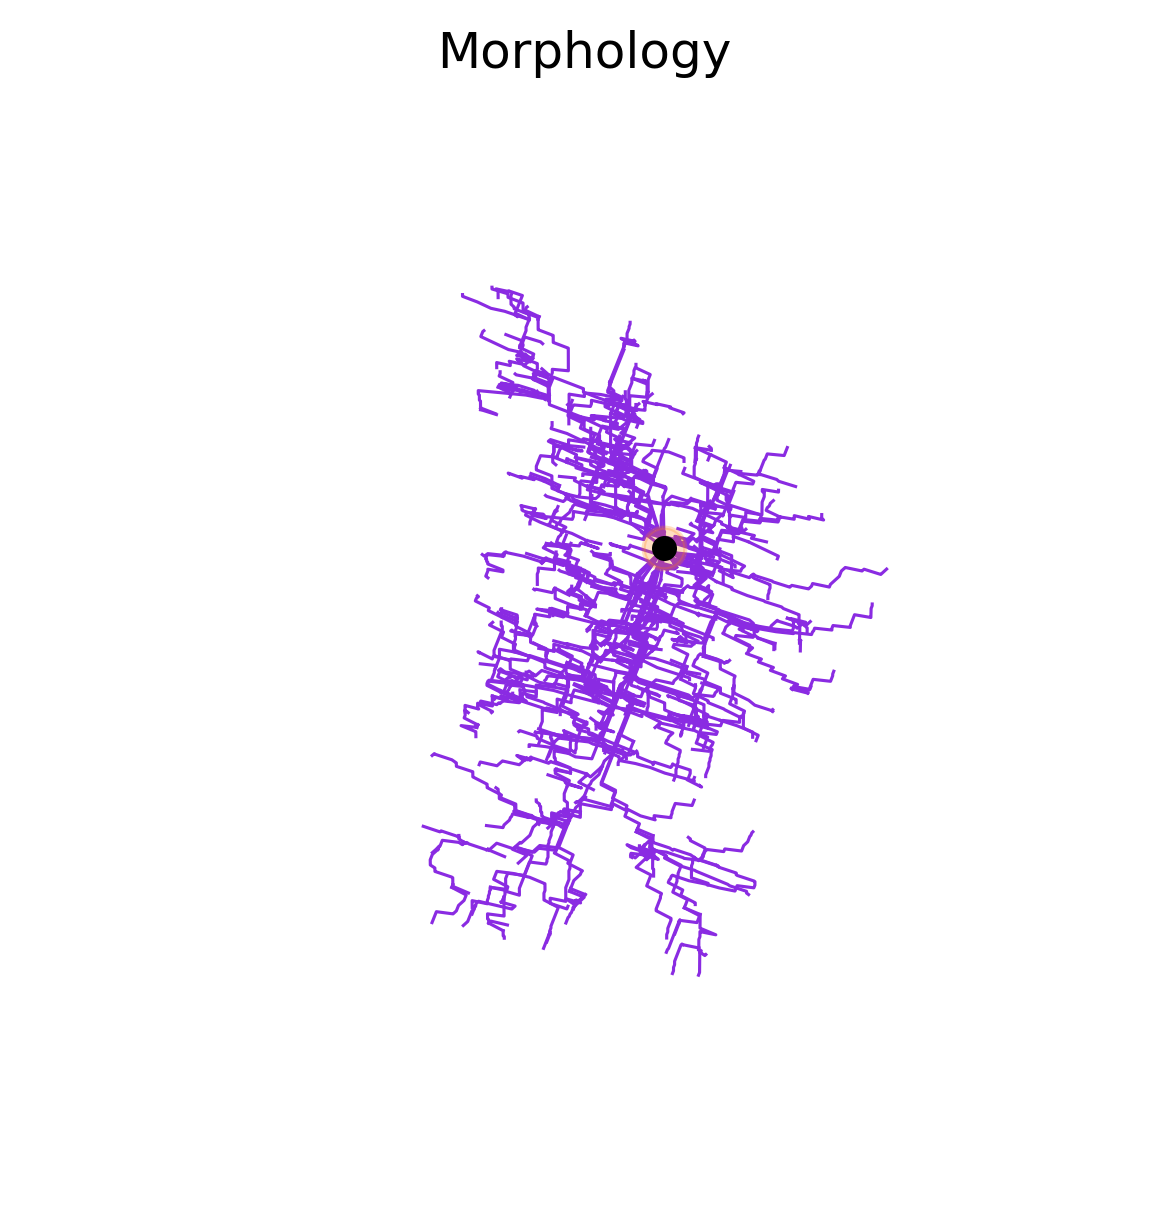

In [154]:
ax = plt.figure(dpi=300).add_subplot(projection='3d')
ax.grid(False)
ax.axis('off')
ax.set_title('Morphology')
plot_morph(ax, m, linewidth=0.75)

In [244]:
def Sholl(morph, step=1):
    
    def dist(a, b):
        return np.linalg.norm(a-b)
    
    def crossings(morph, ident, step):
        h=step
        root = morph.root()
        node = morph.node(ident)
        parent = node.parent.coord()
        r1 = dist(root, parent)
        r2 = dist(root, node)
        k1 = int(r1/h)
        k2 = int(r2/h)
        # r1 = m.distance(p, radial=True)
        # r2 = m.distance(i, radial=True)
        # k1 = int(r1/h)
        # k2 = int(r2/h)
        # return k2-k1, k1
        return k2-k1, k1
        
        
    root = morph.root()
    idents = [node.ident() for node in root.walk()]
    coords = [n.coord() for n in morph.nodes]
    
    rmax = np.max([dist(root, c) for c in coords])
    radx = np.array([k*step for k in range(int(rmax/step))])
    crox = np.zeros(int(rmax/step), dtype=int)

    # rmax = max(m.distance(i, radial=True) for i in idents)
    # radx = np.array([k*step for k in range(int(rmax/step))])
    # crox = np.zeros(int(rmax/step), dtype=int)
    
    for ident in idents:
        ncross, icross = crossings(m, ident, step)
    #     if ncross > 0:
    #         for k in range(ncross):
    #             crox[icross+k] += 1
    #     elif ncross < 0:
    #         for k in range(1,-ncross):
    #             crox[icross-k] += 1
    
    return radx, crox

def SVR():
    pass

In [164]:
for sec in start_node.sections():
    sec = m.coords(sec)
    print(m.coords(sec))

[[ 38. 202. 203.]]
[[ 38. 201. 204.]
 [ 38. 200. 205.]]
[[ 38. 199. 206.]
 [ 38. 199. 207.]
 [ 38. 199. 208.]
 [ 38. 199. 209.]
 [ 38. 199. 210.]
 [ 38. 199. 211.]
 [ 38. 199. 212.]]
[[ 37. 199. 213.]
 [ 37. 199. 214.]
 [ 37. 199. 215.]
 [ 37. 199. 216.]
 [ 37. 199. 217.]
 [ 37. 198. 218.]
 [ 37. 197. 219.]
 [ 37. 196. 220.]
 [ 36. 195. 221.]]
[[ 36. 194. 221.]]
[[ 36. 193. 221.]
 [ 36. 192. 221.]
 [ 36. 191. 221.]]
[[ 36. 190. 222.]
 [ 35. 189. 223.]
 [ 35. 188. 224.]
 [ 35. 187. 224.]
 [ 35. 186. 225.]
 [ 35. 185. 226.]
 [ 35. 184. 227.]
 [ 35. 183. 228.]
 [ 35. 182. 228.]
 [ 35. 181. 229.]
 [ 35. 180. 229.]
 [ 35. 179. 230.]
 [ 35. 178. 230.]
 [ 35. 177. 230.]]
[[ 35. 176. 231.]
 [ 35. 175. 232.]]
[[ 35. 174. 233.]
 [ 35. 173. 234.]
 [ 34. 172. 235.]
 [ 34. 171. 236.]
 [ 34. 170. 237.]]
[[ 34. 169. 238.]]
[[ 34. 169. 239.]]
[[ 34. 169. 240.]
 [ 33. 169. 241.]
 [ 33. 169. 242.]
 [ 33. 169. 243.]
 [ 33. 169. 244.]
 [ 33. 169. 245.]
 [ 33. 169. 246.]
 [ 33. 169. 247.]
 [ 33. 169. 248.]

In [203]:
# [node.ident() for node in start_node.walk()]
for i in range(10):
    print(m.node(i+1).coord())

[ 38. 202. 203.]
[ 38. 201. 204.]
[ 38. 200. 205.]
[ 38. 199. 206.]
[ 38. 199. 207.]
[ 38. 199. 208.]
[ 38. 199. 209.]
[ 38. 199. 210.]
[ 38. 199. 211.]
[ 38. 199. 212.]


In [238]:
node = m.node(10)
node.parent.coord()

array([ 38., 199., 211.])

# TMD

In [2]:
synthesized_morphologies = '/Users/anyak/Documents/Lab/SWC/SCA_swc/*.swc'
